In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn import tree

In [2]:
df = pd.read_csv('/content/employee_data (1) 2 - employee_data (1) 2.csv')

In [4]:
df.head

<bound method NDFrame.head of        avg_monthly_hrs   department  filed_complaint  last_evaluation  \
0                  221  engineering              NaN         0.932868   
1                  232      support              NaN              NaN   
2                  184        sales              NaN         0.788830   
3                  206        sales              NaN         0.575688   
4                  249        sales              NaN         0.845217   
...                ...          ...              ...              ...   
14244              178           IT              NaN         0.735865   
14245              257        sales              NaN         0.638604   
14246              232      finance              1.0         0.847623   
14247              130           IT              NaN         0.757184   
14248              159          NaN              NaN         0.578742   

       n_projects  recently_promoted  salary  satisfaction    status  tenure  
0             

In [17]:
df.isnull()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,False,False,True,False,False,True,False,False,False,False
1,False,False,True,True,False,True,False,False,False,False
2,False,False,True,False,False,True,False,False,False,False
3,False,False,True,False,False,True,False,False,False,False
4,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
14244,False,False,True,False,False,True,False,False,False,False
14245,False,False,True,False,False,True,False,False,False,False
14246,False,False,False,False,False,True,False,False,False,False
14247,False,False,True,False,False,True,False,False,False,False


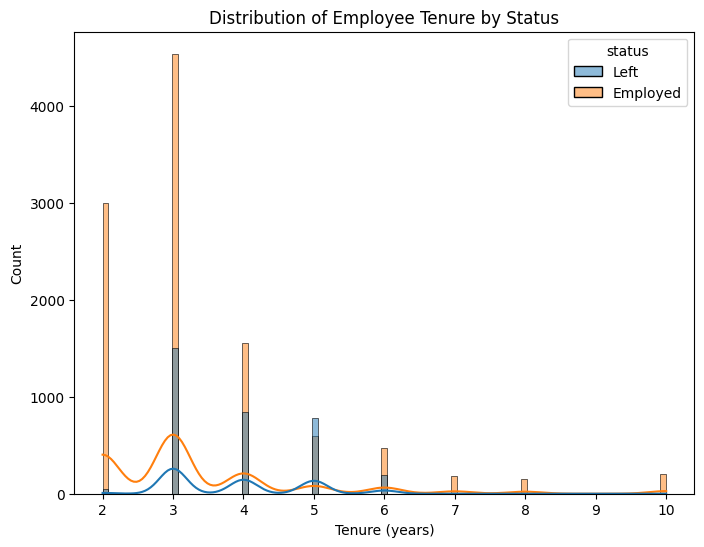

In [5]:
# Task 1: Histogram of Employee Tenure
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='tenure', hue='status', kde=True)
plt.title('Distribution of Employee Tenure by Status')
plt.xlabel('Tenure (years)')
plt.ylabel('Count')
plt.show()

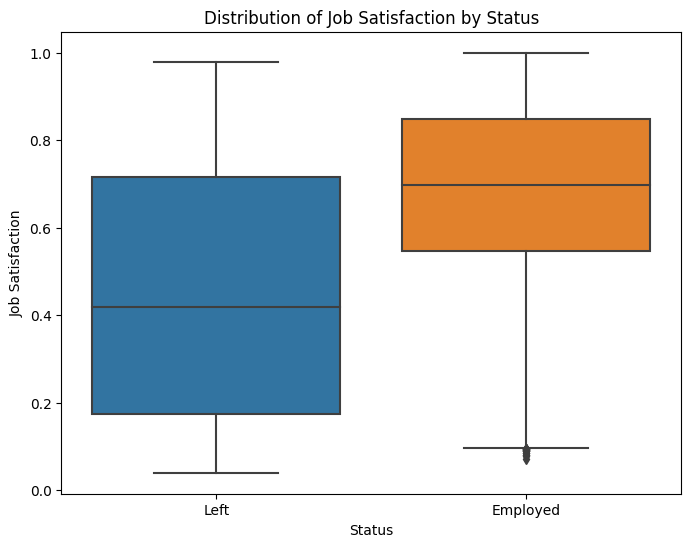

In [6]:
# Task 2: Boxplot of Job Satisfaction by Status
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='status', y='satisfaction')
plt.title('Distribution of Job Satisfaction by Status')
plt.xlabel('Status')
plt.ylabel('Job Satisfaction')
plt.show()

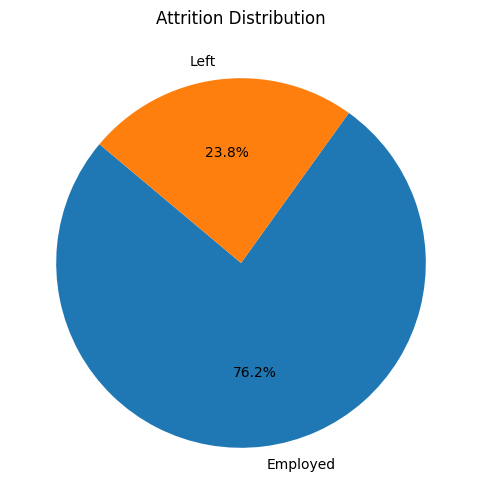

In [7]:
# Task 3: Pie Chart of Attrition
attrition_counts = df['status'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Attrition Distribution')
plt.show()

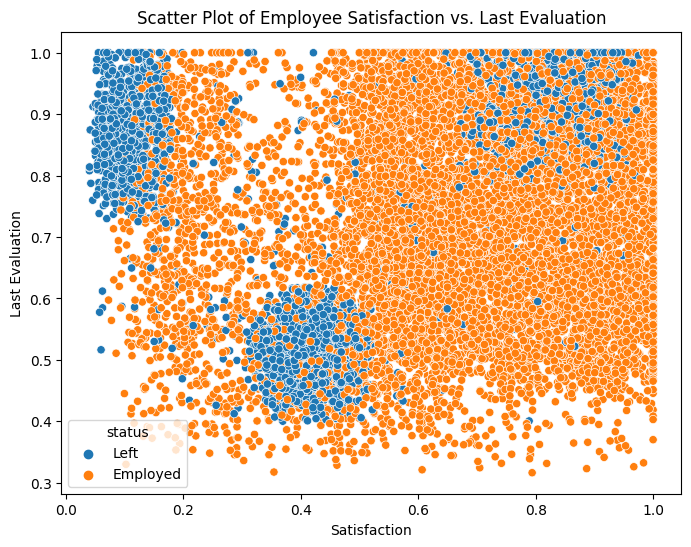

In [8]:
# Task 4: Scatter Plot of Employee Satisfaction vs. Last Evaluation
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='satisfaction', y='last_evaluation', hue='status')
plt.title('Scatter Plot of Employee Satisfaction vs. Last Evaluation')
plt.xlabel('Satisfaction')
plt.ylabel('Last Evaluation')
plt.show()

 Decision Tree Modeling with Tree Pruning and Split Criteria

In [9]:
# Split the dataset into a training set and a testing set
X = df[['tenure', 'satisfaction', 'n_projects']]  # Features
y = df['status']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='gini')  # You can also use 'entropy'

In [15]:
# Fit the model to the training data
clf.fit(X_train, y_train)


ValueError: ignored